<a href="https://colab.research.google.com/github/israa252/Prediction-of-Product-Sales/blob/main/Project1_Part4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Save the filepath and load the data as "df_titanic"
fpath  ="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df= pd.read_csv(fpath)
df.info()
df.head()
df.shape
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [2]:
# Drop duplicate rows
df = df.drop_duplicates()
# Check missing values
df.isnull().sum()

# Replace placeholders
df.replace({
    'Item_Weight': {0: np.nan},
    'Outlet_Size': {"Unknown": np.nan},
}, inplace=True)


# Check missing values again
df.isnull().sum()

# Standardize text: lowercase all values in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower()

# Replace inconsistent categories with consistent labels
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'low_fat',
    'lf': 'low_fat',
    'reg': 'regular'
})

# Display summary statistic (min, max, mean of numeric columns)
df.describe().loc[['min', 'max', 'mean']]

# Preview first 10 rows
df.head(10)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low_fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low_fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low_fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,low_fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## EDA Functions

In [3]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [4]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#Item_Identifier

Definition: Unique product ID.



##Univariate Visualization

In [5]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


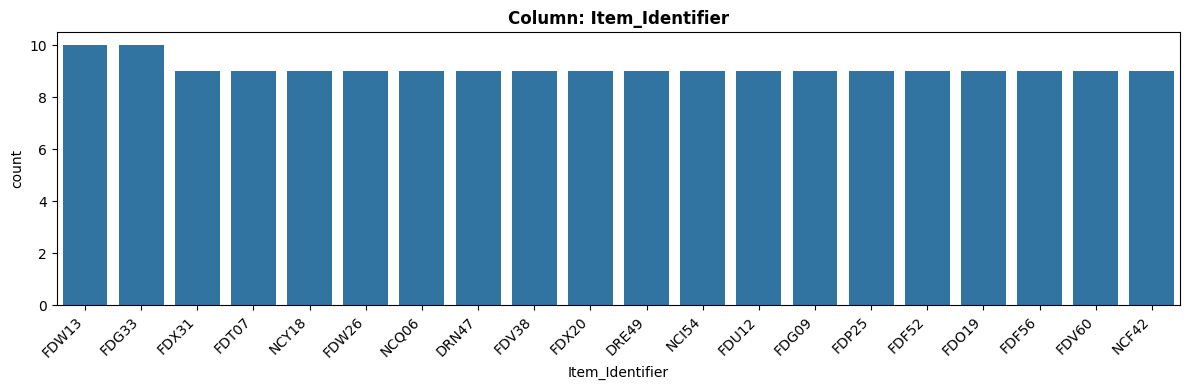

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [6]:
top20 = df['Item_Identifier'].value_counts().head(20).index
explore_categorical(df, 'Item_Identifier', order=top20, figsize=(12,4))

**Feature Observations**

What type of feature is it?
Categorical (Nominal, ID)

How many null values? What percentage? What would you do with the null values?
0 null values (0%), no action needed.

Is the feature constant or quasi-constant?
Quasi-constant, almost all values are unique.

What is the cardinality? Is it high (>10)?
Unique values: 1559 → High (>10)

Would we know this BEFORE the target is determined?
Yes, the Item Identifier is known before sales are determined.

Is there a business case/understanding reason to exclude based on our business case?
Yes, it should be excluded because it is just an ID and does not provide meaningful information.


#Multivariate Visualization

/tmp/ipython-input-1648968995.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

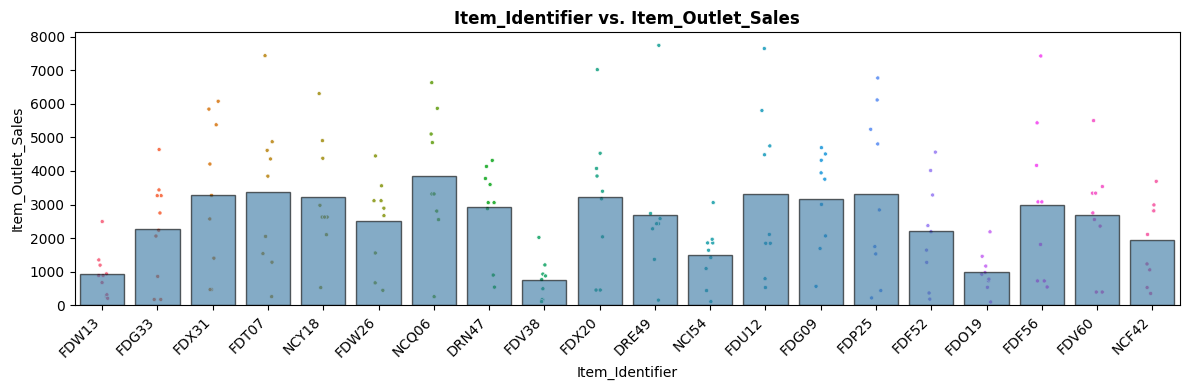

In [7]:

top20 = df['Item_Identifier'].value_counts().head(20).index
df_top20 = df[df['Item_Identifier'].isin(top20)]
plot_categorical_vs_target(df_top20, x='Item_Identifier', y='Item_Outlet_Sales', order=top20, figsize=(12,4))


Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

No, it is just an ID and does not provide useful information for predicting sales.

Does this feature appear to be a predictor of the target?

No, differences in sales come from the product itself, not the identifier.

#Item_Weight

Definition:Weight of the product



##Univariate Visualization

In [8]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

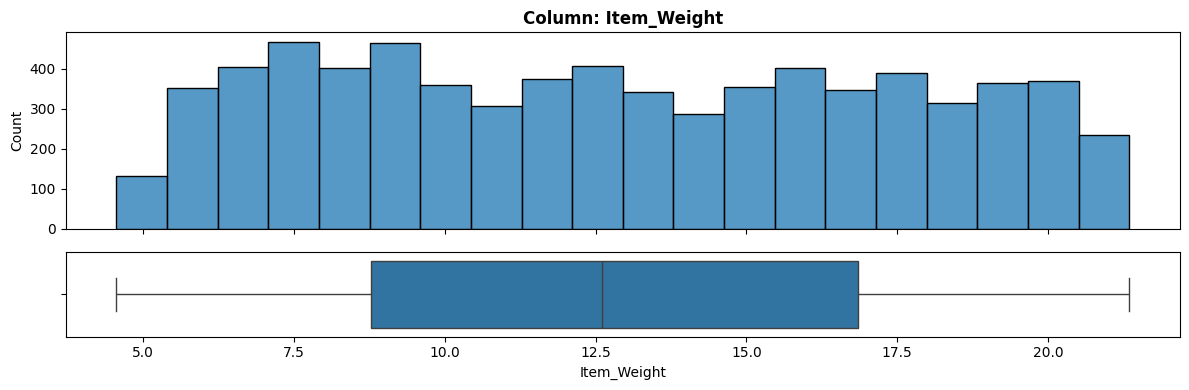

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [9]:
top20 = df['Item_Weight'].value_counts().head(20).index
explore_numeric(df, 'Item_Weight', figsize=(12,4))

**Feature Observations**

What type of feature is it?
Numeric  

How many null values? What percentage? What would you do with the null values?
1463 null values (~17%). Impute using mean or median.

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
High (many unique values).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, item weight may influence sales (e.g., heavier products could indicate bulk items).


#Multivariate Visualization

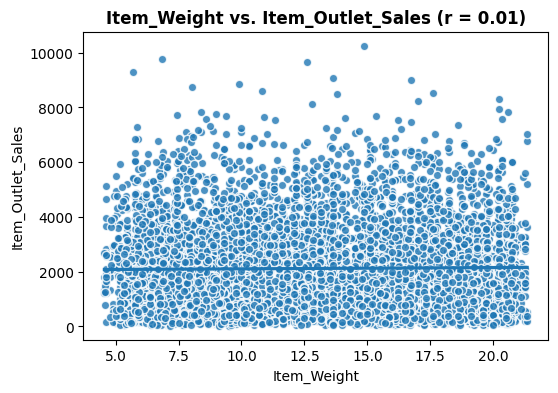

In [10]:
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, product weight may affect consumer decisions (e.g., bulk vs. light items).

Does this feature appear to be a predictor of the target?

Yes, but the relationship seems weaker compared to features like price. `

#Item_Fat_Content

Definition:Whether the product is low fat or regular



##Univariate Visualization

In [11]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


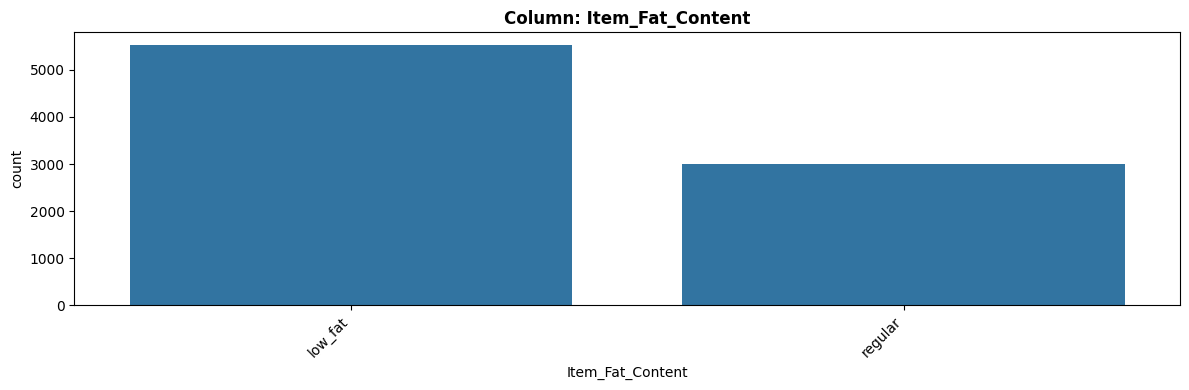

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'low_fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [12]:
top20 = df['Item_Fat_Content'].value_counts().head(20).index
explore_categorical(df, 'Item_Fat_Content', order=top20, figsize=(12,4))

**Feature Observations**

What type of feature is it?
Categorical (Nominal).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
Low (a few categories: low_fat, regular, etc.).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, fat content may influence consumer choices, so it is useful.


#Multivariate Visualization

/tmp/ipython-input-1648968995.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

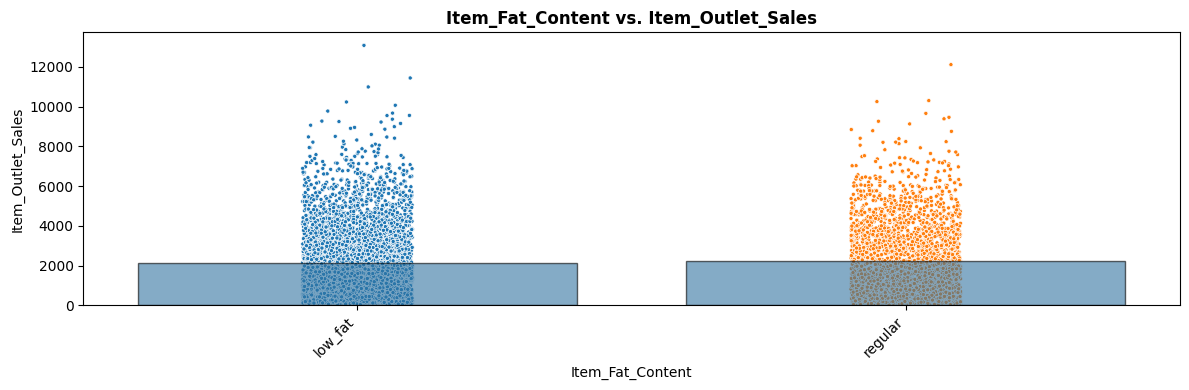

In [13]:

top20 = df['Item_Fat_Content'].value_counts().head(20).index
df_top20 = df[df['Item_Fat_Content'].isin(top20)]

plot_categorical_vs_target(df_top20, x='Item_Fat_Content', y='Item_Outlet_Sales', order=top20, figsize=(12,4))


Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, fat content can influence consumer preference and demand.

Does this feature appear to be a predictor of the target?

Yes, categories like "low fat" and "regular" show differences in average sales.

#Item_Visibility

Definition:Percentage of total display area allocated to product



##Univariate Visualization

In [14]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

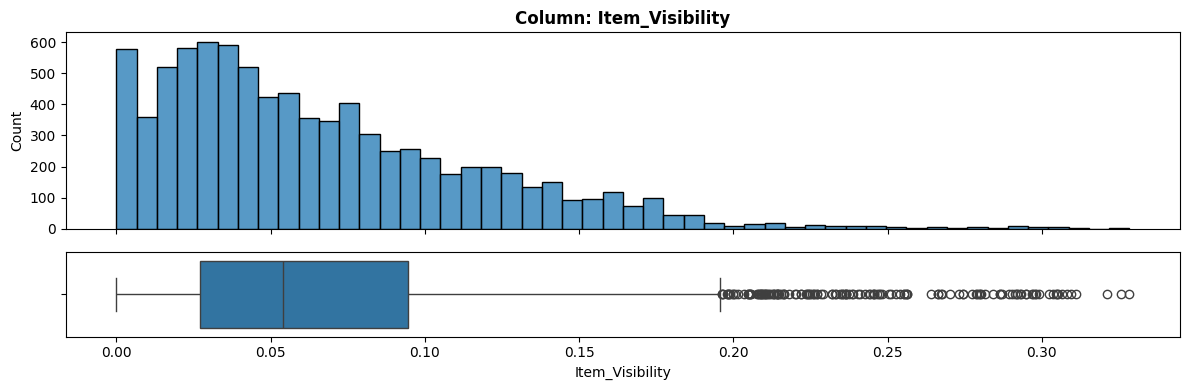

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [15]:
top20 = df['Item_Visibility'].value_counts().head(20).index
explore_numeric(df, 'Item_Visibility', figsize=(12,4))

**Feature Observations**

What type of feature is it?
Numeric (Continuous).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
High (many unique percentages).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, visibility likely impacts sales directl


#Multivariate Visualization

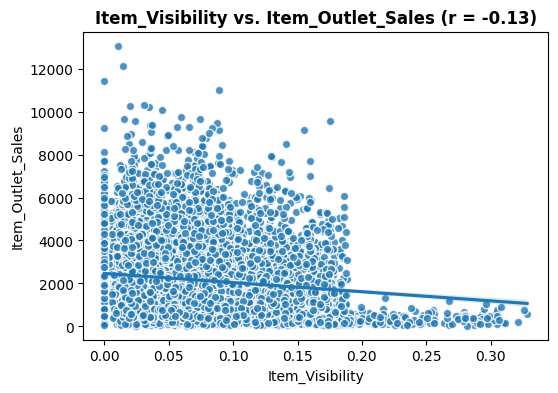

In [16]:

plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, visibility in stores influences how often items are purchased.

Does this feature appear to be a predictor of the target?

Yes, higher visibility is linked with higher sales.

#Item_Type

Definition:Category of product



##Univariate Visualization

In [17]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


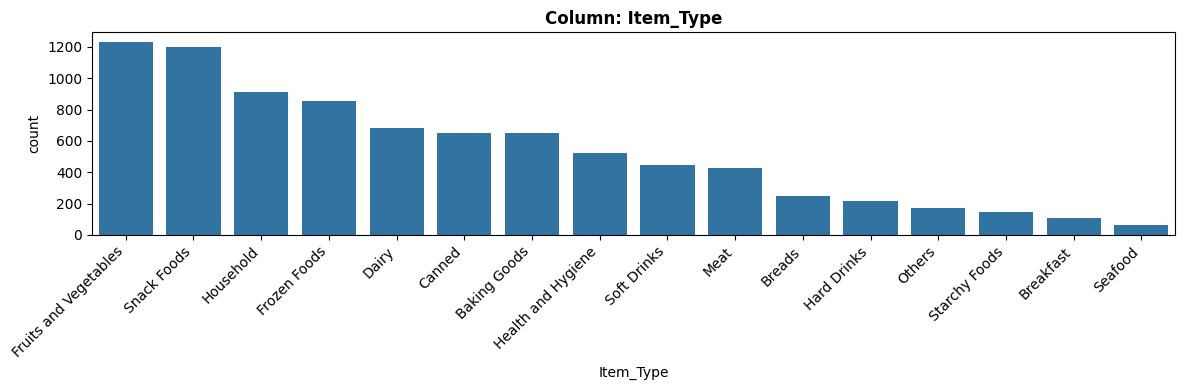

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [18]:
top20 = df['Item_Type'].value_counts().head(20).index
explore_categorical(df, 'Item_Type', order=top20, figsize=(12,4))

**Feature Observations**

What type of feature is it?
Categorical (Nominal).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
Medium (16 unique types).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, item type is directly related to sales.


#Multivariate Visualization

/tmp/ipython-input-1648968995.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

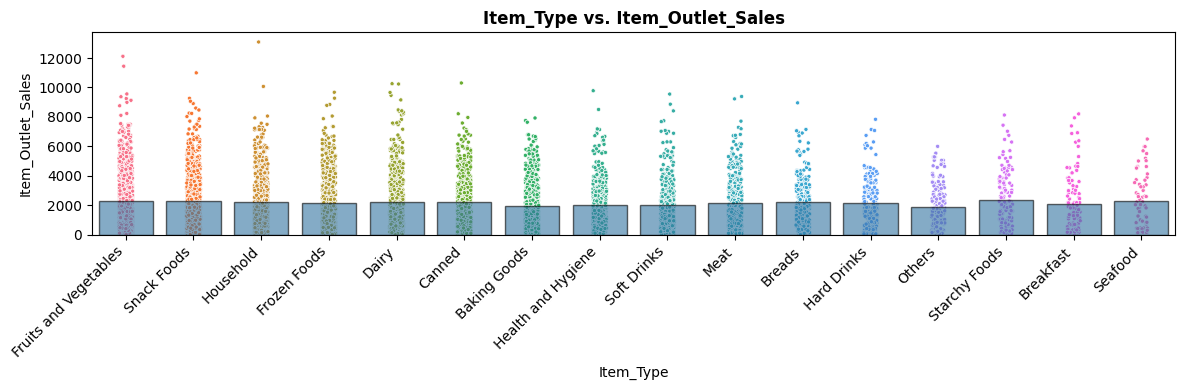

In [19]:

top20 = df['Item_Type'].value_counts().head(20).index
df_top20 = df[df['Item_Type'].isin(top20)]
plot_categorical_vs_target(df_top20, x='Item_Type', y='Item_Outlet_Sales', order=top20, figsize=(12,4))

- Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, product category directly affects demand and customer choices.

Does this feature appear to be a predictor of the target?

Yes, sales vary significantly across categories like snacks, dairy, and beverages.

#Item_MRP

Definition: Maximum Retail Price



##Univariate Visualization

In [20]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

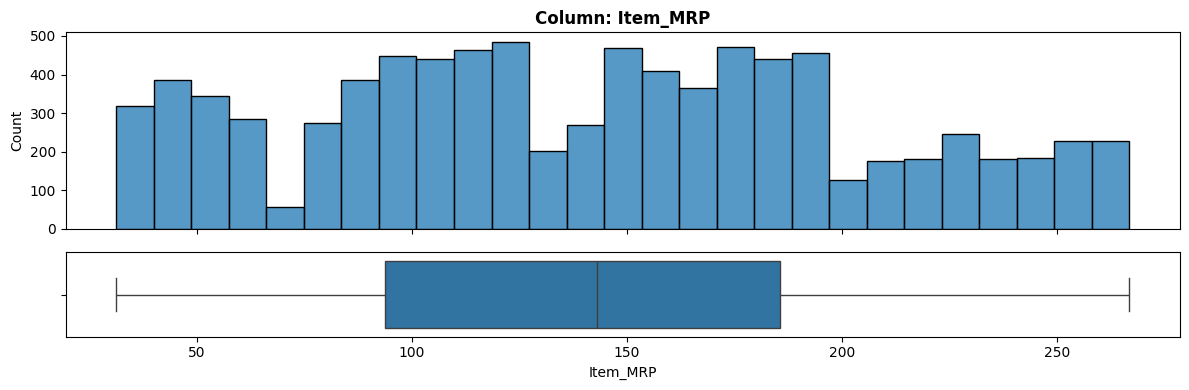

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [21]:
explore_numeric(df, 'Item_MRP', figsize=(12,4))

**Feature Observations**

What type of feature is it?
Numeric (Continuous).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
High (many unique prices).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, price is one of the strongest predictors of sales.


#Multivariate Visualization

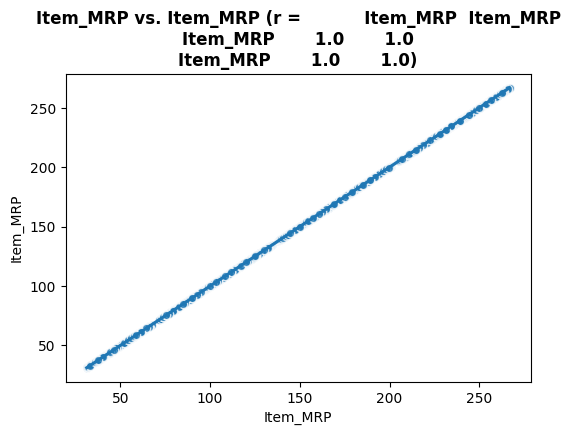

In [22]:

plot_numeric_vs_target(df,feature, 'Item_MRP');

- Feature vs. Target Observations:

Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, product price is a major factor in sales volume since customers are sensitive to price levels.

Does this feature appear to be a predictor of the target?

Yes, there is a strong positive correlation between Item MRP and Item Outlet Sales.

#Outlet_Identifier

Definition: Unique outlet ID



##Univariate Visualization

In [23]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

/tmp/ipython-input-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


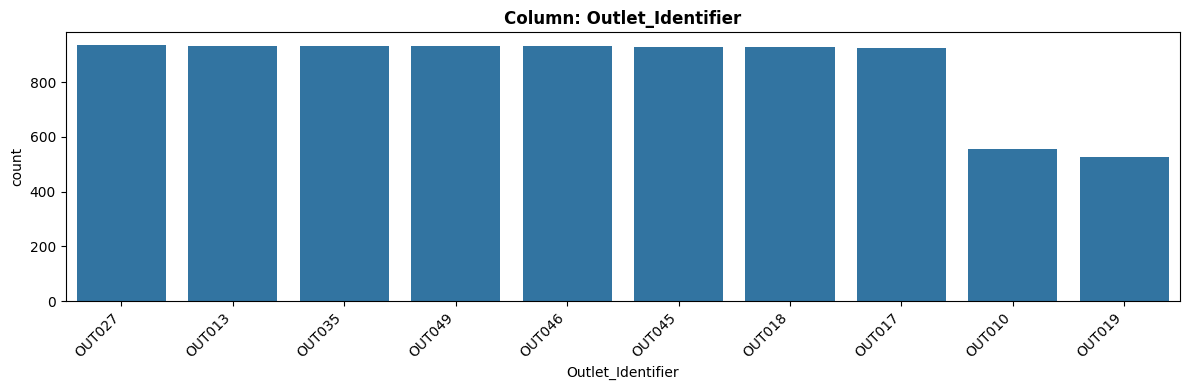

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [24]:
top20 = df['Outlet_Identifier'].value_counts().head(20).index
explore_categorical(df, 'Outlet_Identifier', order=top20, figsize=(12,4))

**Feature Observations**

What type of feature is it?
Categorical (Nominal, ID).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
Medium (10 outlets).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
Yes, it is more of an ID, but could be encoded if outlet-specific differences matte

#Multivariate Visualization

/tmp/ipython-input-1648968995.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 1200x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

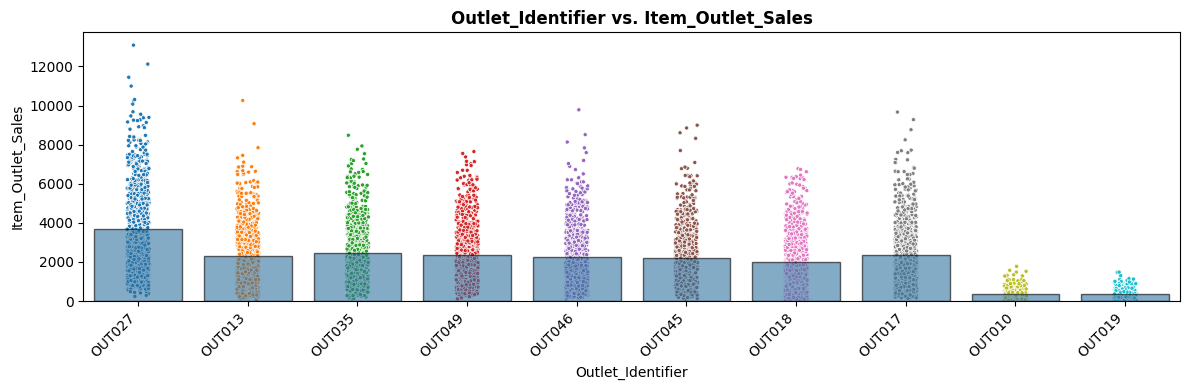

In [25]:

top20 = df['Outlet_Identifier'].value_counts().head(20).index
df_top20 = df[df['Outlet_Identifier'].isin(top20)]

plot_categorical_vs_target(df_top20, x='Outlet_Identifier', y='Item_Outlet_Sales', order=top20, figsize=(12,4))


- Feature vs. Target Observations:
 Based on your business understanding, would you expect this feature to be a predictor of the target?

No, it is more like an ID and not inherently predictive.

Does this feature appear to be a predictor of the target?

Not directly, but outlet-specific differences might cause some predictive effect

#Outlet_Establishment_Year

Definition:Year of establishment



##Univariate Visualization

In [26]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

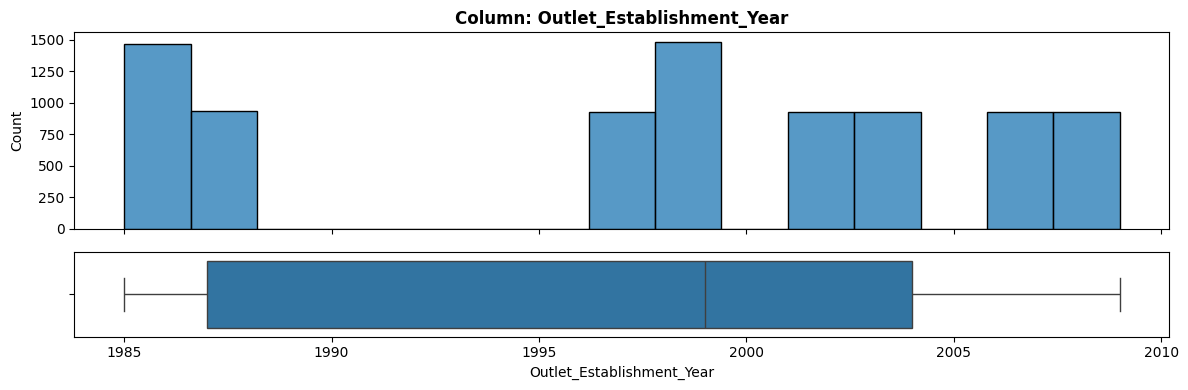

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 1200x400 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [27]:
explore_numeric(df, 'Outlet_Establishment_Year', figsize=(12,4))

**Feature Observations**

What type of feature is it?
Numeric (Discrete, Year).

How many null values? What percentage? What would you do with the null values?
0 null values (0%).

Is the feature constant or quasi-constant?
No.

What is the cardinality? Is it high (>10)?
Low (few establishment years).

Would we know this BEFORE the target is determined?
Yes.

Is there a business case/understanding reason to exclude based on our business case?
No, store age may affect sales.


#Multivariate Visualization

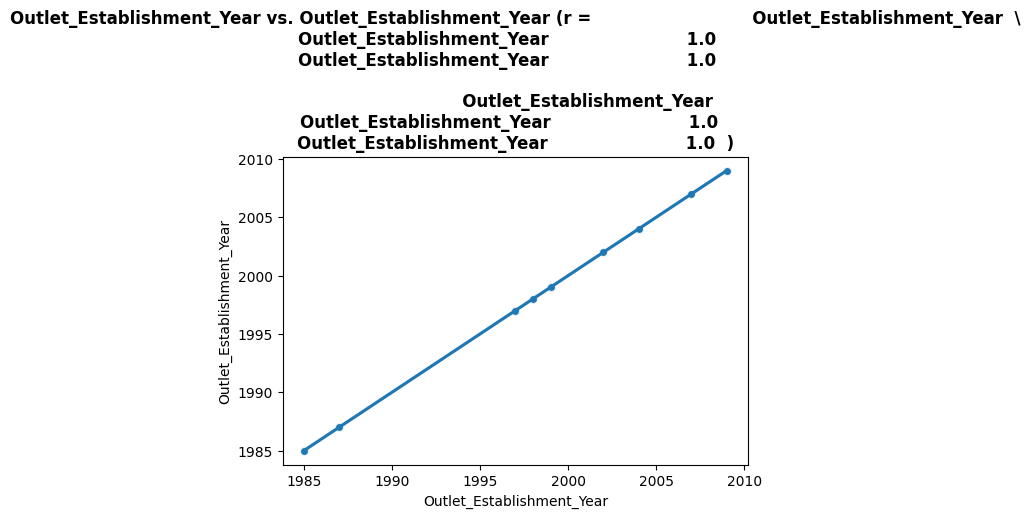

In [28]:
plot_numeric_vs_target(df,feature, 'Outlet_Establishment_Year');

- Feature vs. Target Observations:
Based on your business understanding, would you expect this feature to be a predictor of the target?

Yes, older outlets may have stronger customer loyalty and reputation.

Does this feature appear to be a predictor of the target?

Yes, sales patterns differ slightly across establishment years.